Creación de dataframes y almacenamiento

Por lo general, la creación de dataframes **surge por la necesidad de combinar resultados de diferentes pruebas o muestreos**. En este bloque veremos como combinar series de muestras en un único dataframe. Hay muchas maneras de hacerlo. Aquí os enseñamos la que nosotros consideramos más rápida.


## Contenido

- M2_0 Introducción a la estructura DataFrame: características, carga y acceso.
- **M2_1 Creación y Almacenamiento.**
- M2_2 Visualización con pandas.
- M2_3 Otras operaciones con DataFrames: agrupaciones de datos.
- M2_4 Gestionando datos perdidos.
- M2_5 Series temporales

In [ ]:
import pandas as pd

##  Creación de un Dataframe

La siguiente sentencia muestra cómo se crea un DataFrame vacío.

In [1]:
df = pd.DataFrame()
print(type(df))
print(df.columns)
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
Index([], dtype='object')
(0, 0)


Necesitamos datos para rellenar el dataframe.

Vamos a crear varias series de datos (listas) para realizar pruebas. 

**Importante**: Las series han de tener la misma longitud!

In [2]:
nombre = ["Daenerys","Jon","Tyrion","Arya","Eddard","Sansa","Cersei","Jaime","Joffrrey","Khal"]
familia = ["Targaryen","Snow","Lannister","Stark","Stark","Stark","Lannister","Lannister","Lannister","Drogo"]

In [3]:
print(len(nombre)) 
print(len(familia))

10
10


### Rellenamos el dataframe con las listas que acabamos de crear

Las columnas de un dataframe se pueden crear dinámicamente mediante la assignación de una serie al nombre de la columna. Pandas creará la columna con la assignación.

La primera columna que se añade al DataFrame es la que fija el tamaño que deben tener las demás. Recordad que todas las columnas deben tener la misma longitud.

A continuación mostramos cómo se pueden crear las columnas de los datos anteriores.

In [4]:
df["nombre"] = nombre  
df["familia"] = familia 

In [5]:
df

,nombre,familia
0,Daenerys,Targaryen
1,Jon,Snow
2,Tyrion,Lannister
3,Arya,Stark
4,Eddard,Stark
5,Sansa,Stark
6,Cersei,Lannister
7,Jaime,Lannister
8,Joffrrey,Lannister
9,Khal,Drogo


### ¿Qué ocurrirá si intentamos añadir una serie de diferente longitud? 


In [6]:
# genero = [0,1,0] 
# df["genero"] = genero 

In [7]:
print(df.shape)
print(df.columns)
print(df.index)

(10, 2)
Index([u'nombre', u'familia'], dtype='object')
RangeIndex(start=0, stop=10, step=1)


Ahora ya sabemos cómo añadir nuevas columnas al DataFrame dinamicamente. Pero, ¿Cómo añadimos filas?

En este caso la [siguiente función](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.append.html) nos será de gran ayuda.


Primer intento:

In [8]:
df.append(["Robert", "Baratheon"])

,0,familia,nombre
0,NaN,Targaryen,Daenerys
1,NaN,Snow,Jon
2,NaN,Lannister,Tyrion
3,NaN,Stark,Arya
4,NaN,Stark,Eddard
5,NaN,Stark,Sansa
6,NaN,Lannister,Cersei
7,NaN,Lannister,Jaime
8,NaN,Lannister,Joffrrey
9,NaN,Drogo,Khal


Esto no tiene muy buena pinta, ....

Si revisamos mejor la documentación vemos que el primer paràmetro puede ser un diccionario, más abajo (en la documentación) tenemos un ejemplo de su uso. Probamos:

In [9]:
df.append({
    "nombre": "Robert",
    "familia": "Baratheon"
}, ignore_index=True)

,nombre,familia
0,Daenerys,Targaryen
1,Jon,Snow
2,Tyrion,Lannister
3,Arya,Stark
4,Eddard,Stark
5,Sansa,Stark
6,Cersei,Lannister
7,Jaime,Lannister
8,Joffrrey,Lannister
9,Khal,Drogo


**El dataframe no muestra los cambios!!!** ¿Porqué?

In [11]:
df = df.append({
    "nombre": "Robert",
    "familia": "Baratheon"
}, ignore_index=True)

In [12]:
df

,nombre,familia
0,Daenerys,Targaryen
1,Jon,Snow
2,Tyrion,Lannister
3,Arya,Stark
4,Eddard,Stark
5,Sansa,Stark
6,Cersei,Lannister
7,Jaime,Lannister
8,Joffrrey,Lannister
9,Khal,Drogo


Otra manera de crear dataframes, a partir de un diccionario.

In [13]:
dfBasic = pd.DataFrame({"altura":[1,2,3],"peso":[10,20,30],"anchura":[3,5,7]})
print(dfBasic)

   altura  anchura  peso
0       1        3    10
1       2        5    20
2       3        7    30


Para crear el DataFrame que utilizabamos en los ejemplos anteriores nos bastaria con la siguiente sentencia:

In [14]:
# Definimos las tres listas
nombre = ["Daenerys","Jon","Tyrion","Arya","Eddard","Sansa","Cersei","Jaime","Joffrrey","Khal"]
familia = ["Targaryen","Snow","Lannister","Stark","Stark","Stark","Lannister","Lannister","Lannister","Drogo"]

# Creamos el dataframe con las listas
dfGOT = pd.DataFrame({
    "nombre": nombre,
    "familia": familia
})
print(dfGOT)

     familia    nombre
0  Targaryen  Daenerys
1       Snow       Jon
2  Lannister    Tyrion
3      Stark      Arya
4      Stark    Eddard
5      Stark     Sansa
6  Lannister    Cersei
7  Lannister     Jaime
8  Lannister  Joffrrey
9      Drogo      Khal



Debemos tener en cuenta que la creación de un dataframe normalmente se hace en un entorno más complicado: captura de datos de la red, computación de los valores, processamiento de los datos antes de añadirlos al dataFrame, ... 

En este entorno, la primera manera de crear el DataFrame, más versàtil, suele ser más útil.

**Podemos aprovechar características de numpy para crear series y asignarlas al dataframe**
Esto es útil para crear conjunto de datos de pruebas o bien, basados en algunas distribuciones probabilísticas.

En la documentación de Numpy podemos ver las distribuciones implementadas en el [siguiente enlace](https://docs.scipy.org/doc/numpy-1.14.0/reference/routines.random.html).

In [19]:
import numpy as np

altura = np.random.normal(1.6,scale=0.3,size=len(df.nombre))

print(altura)

[1.66678483 1.10230863 1.80143616 1.18658552 1.17012881 1.28077095
 1.19566873 1.92654596 1.65446459 1.26766409 1.55804262]


In [20]:
df["altura"] = altura
print(df["altura"].describe())
print(df.shape)

count    11.000000
mean      1.437309
std       0.290599
min       1.102309
25%       1.191127
50%       1.280771
75%       1.660625
max       1.926546
Name: altura, dtype: float64
(11, 3)


**Vamos a visualizar esta distribución**

(array([0.0609738 , 0.07621725, 0.0914607 , 0.0914607 , 0.0914607 ,
        0.1524345 , 0.22865174, 0.47254694, 0.53352073, 0.88412007,
        0.89936352, 1.00606767, 1.14325872, 1.64629255, 1.43288426,
        1.26520631, 1.17374562, 0.89936352, 0.85363317, 0.60973798,
        0.51827728, 0.42681659, 0.27438209, 0.21340829, 0.07621725,
        0.0304869 , 0.0304869 , 0.04573035, 0.        , 0.01524345]),
 array([0.67360519, 0.73920714, 0.80480909, 0.87041104, 0.93601298,
        1.00161493, 1.06721688, 1.13281883, 1.19842078, 1.26402273,
        1.32962468, 1.39522663, 1.46082858, 1.52643053, 1.59203248,
        1.65763442, 1.72323637, 1.78883832, 1.85444027, 1.92004222,
        1.98564417, 2.05124612, 2.11684807, 2.18245002, 2.24805197,
        2.31365391, 2.37925586, 2.44485781, 2.51045976, 2.57606171,
        2.64166366]),
 <a list of 30 Patch objects>)

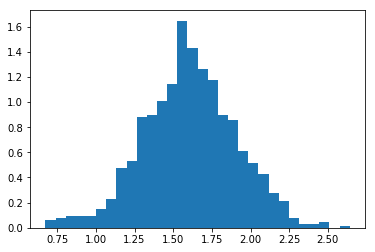

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt

random_normal = np.random.normal(1.6,scale=0.3,size=1000)
plt.hist(random_normal, 30, density=True)


#  2. Almacenando un DataFrame
Hay múltiples formatos: 
- pickle: original ASCII data format
- cPickle, a C library
- pickle-p2: uses the newer binary format
- json: standardlib json library
- json-no-index: like json, but without index
- msgpack: binary JSON alternative
- CSV
- hdfstore: HDF5 storage format



**Atención:** Veremos tan solo: CSV, y HDF5

### El tipo de formato determina el rendimiento de la aplicación


<img src="files/rendimiento.png"/>

### Formato CSV 

Cómo almacenamos el DataFrame en este formato?


Documentación: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_csv.html


In [22]:
df.to_csv("data/df_test.csv") # Guardamos el dataframe con los valores por defecto

**Truco**
Si habéis usado Jupyter, se pueden invocar comandos de shell anteponiendo el simbolo !  

In [23]:
!type data\df_test.csv 

,nombre,familia,altura
0,Daenerys,Targaryen,1.666784826074884
1,Jon,Snow,1.1023086250403267
2,Tyrion,Lannister,1.8014361595946087
3,Arya,Stark,1.1865855178064322
4,Eddard,Stark,1.170128811974173
5,Sansa,Stark,1.2807709485628864
6,Cersei,Lannister,1.195668733804172
7,Jaime,Lannister,1.9265459593998486
8,Joffrrey,Lannister,1.654464587198024
9,Khal,Drogo,1.2676640870213522
10,Robert,Baratheon,1.558042618414715


### HDF5 almacenamiento
Son bases de datos (al estilo clave-valor) que contienen un tipo de fichero especial para gestionar la información que se almacena.

La información se guarda mediante la asociación de un nombre "key" y el valor que se quiera relacionar con el: una serie, un dataframe, etc.


In [34]:
#Es necesario importar la librería
from pandas import HDFStore

hdf = HDFStore('data/storage.h5')


Almacenamos el dataframe en la base de datos HDF5 con la función PUT.

La siguiente sentencia almacena el dataframe "df" cómo una tabla de la base de datos llamada "d1":

In [27]:
hdf.put('d1', df, format='table', data_columns=True)

Para consultar la tabla que acabamos de crear, podemos acceder de la siguiente manera:

In [36]:
hdf.d1

,nombre,familia,altura
0,Daenerys,Targaryen,1.666785
1,Jon,Snow,1.102309
2,Tyrion,Lannister,1.801436
3,Arya,Stark,1.186586
4,Eddard,Stark,1.170129
5,Sansa,Stark,1.280771
6,Cersei,Lannister,1.195669
7,Jaime,Lannister,1.926546
8,Joffrrey,Lannister,1.654465
9,Khal,Drogo,1.267664


In [37]:
hdf["d1"]

,nombre,familia,altura
0,Daenerys,Targaryen,1.666785
1,Jon,Snow,1.102309
2,Tyrion,Lannister,1.801436
3,Arya,Stark,1.186586
4,Eddard,Stark,1.170129
5,Sansa,Stark,1.280771
6,Cersei,Lannister,1.195669
7,Jaime,Lannister,1.926546
8,Joffrrey,Lannister,1.654465
9,Khal,Drogo,1.267664


Cerramos el fichero para liberar recursos i poder realizar operaciones con otros recursos HDF5.

In [38]:
hdf.close()
hdf.is_open

False

Para leer la tabla directamente del fichero podemos utilizar la función "read_hdf". Así nos evitamos cargar toda la base de datos en la memoria.

In [40]:
from pandas import read_hdf
df2 = read_hdf('data/storage.h5', 'd1')
print(df2)

      nombre    familia    altura
0   Daenerys  Targaryen  1.666785
1        Jon       Snow  1.102309
2     Tyrion  Lannister  1.801436
3       Arya      Stark  1.186586
4     Eddard      Stark  1.170129
5      Sansa      Stark  1.280771
6     Cersei  Lannister  1.195669
7      Jaime  Lannister  1.926546
8   Joffrrey  Lannister  1.654465
9       Khal      Drogo  1.267664
10    Robert  Baratheon  1.558043


Una de las funcionalidades más potentes de HDF5 és que se pueden realizar "queries"  directamente al fichero, de una forma muy sencilla.

Esta operación és mucho más eficiente que cargar el dataframe entero i luego filtrar a sobre.

In [41]:
# Consultamos todos los registros de miembros de la familia Stark
df3 = read_hdf('data/storage.h5', 'd1', where=['familia==Stark'])
print(df3)

   nombre familia    altura
3    Arya   Stark  1.186586
4  Eddard   Stark  1.170129
5   Sansa   Stark  1.280771


In [42]:
# Consultamos una única columna
df4 = read_hdf('data/storage.h5', 'd1', columns=["nombre"])
print(df4)

      nombre
0   Daenerys
1        Jon
2     Tyrion
3       Arya
4     Eddard
5      Sansa
6     Cersei
7      Jaime
8   Joffrrey
9       Khal
10    Robert


## EJERCICIOS

**1) Crea un dataframe con al menos 4 series de 100 elementos:**

Las series son las siguientes:
- name : Distribución aleatoria de 8 characteres 
- km2  : Distribución aleatoria uniforme entre 10-100
- age  : Distribución normal entre 1-90 (más o menos), media y desviación típica a vuestro gusto.
- level: Distribución aleatoria de cuatro grados: none, school, high, university

docs: https://docs.scipy.org/doc/numpy/reference/routines.random.html

In [73]:
# Pista para la creación de nombres y niveles
import string
import numpy as np
print(string.ascii_uppercase)
print(string.digits)
print(string.digits+string.ascii_uppercase)
print(np.random.choice(list(string.ascii_uppercase)))
print(''.join(np.random.choice(list(string.ascii_uppercase)) for i in range(8)))

ABCDEFGHIJKLMNOPQRSTUVWXYZ
0123456789
0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ
A
UNLNQJNF


**2) Guarda el dataframe en un fichero CSV. ¿Cuánto espacio ocupa?. ¿Puedes abrirlo en excel?**

**3) Guarda el dataframe anterior en una fichero HDF5. ¿Cuánto espacio ocupa? ¿Puedes abrirlo en un excel?**

**4) Crea un nuevo dataframe con las columnas: age y level, donde *level == none*. ¿Cuántas filas hay?**

**5) Guarda del ejercicio 4, en el mismo HDF5, con una *key* diferente.** 

**6) En un nuevo dataframe, carga del fichero HDF5 -el df del ejercicio 4- aquellas observaciones con el atributo *age* por encima de los 40 años.**

**7) Repite el paso 2 y 3 pero está vez mirando cuanto tiempo tardas en hacer una operación de escritura (CSV,HDF5) y de carga de ambos dataframes.**


In [ ]:
#PISTA: Como capturar la hora del sistema 
import time
start = time.clock()
## Guarda CSV
time.sleep(2) #para la ejecución 2ms
###
end = time.clock()
print("Tiempo necesitado: %fs" %(end-start))